# Jerlov ReFit

Refit physical heating parameters as a function of Kpar, so no negative values

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import leastsq

%matplotlib inline

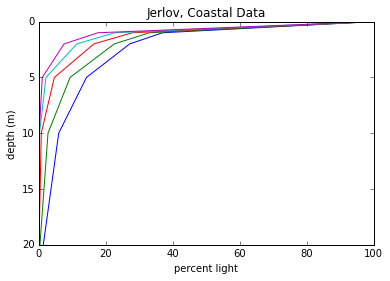

In [2]:
# Attenuation from Jerlov, Table XXVIII for water types 1, 3, 5, 7, 9 respectively
rad = np.zeros((5,6))
rad[0] = (100, 36.9, 27.1, 14.2, 5.9, 1.3)
rad[1] = (100, 33, 22.5, 9.3, 2.7, 0.3)
rad[2] = (100, 27.8, 16.4, 4.6, 0.69, 0.020)
rad[3] = (100, 22.6, 11.3, 2.1, 0.17, 0.)
rad[4] = (100, 17.6, 7.5, 1.0, 0.052, 0)
depth = np.array([0, 1, 2, 5, 10, 20])

fig, ax = plt.subplots()
for i in range(5):
    ax.plot(rad[i], depth)
ax.invert_yaxis()
ax.set_xlabel('percent light')
ax.set_ylabel('depth (m)')
ax.set_title("Jerlov, Coastal Data");

In [3]:
# Following Paulson, C. A., and J. J. Simpson, 1977: Irradiance measurements in the upper ocean, 
# J. Phys. Oceanogr., 7, 952-956. We fit to double exponentials.  I played with the 70/30 fit.  This is pretty
# good for murky water
def double_ex(k, depth, light):
    return -light + 100*(0.7*np.exp(-depth*k[0])+ 0.3*np.exp(-depth*k[1]))

In [4]:
# do the fitting and get the k's.  the first one is for blue light, the second for red
k = np.zeros((5,2))
for i in range(5):
    args = (depth, rad[i])
    k0 = [0.2, 0.1]
    k[i], msg = leastsq(double_ex, k0, args=args)
    print (k[i], msg)

[ 1.77136976  0.1465778 ] 1
[ 2.00801637  0.2188344 ] 1
[ 2.33783367  0.34756303] 1
[ 2.72562182  0.50887154] 1
[ 3.26604073  0.69803966] 1


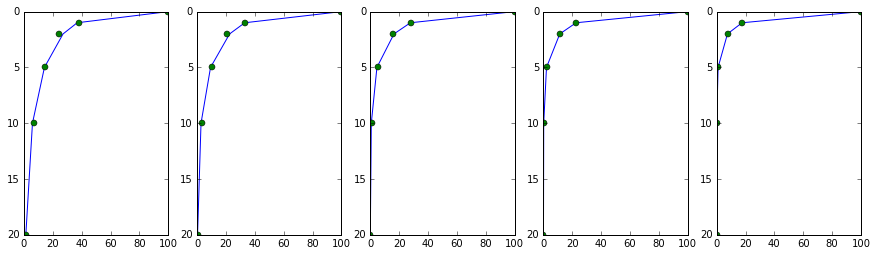

In [5]:
# check the fit
fig, ax = plt.subplots(1,5, figsize=(15,4))
for i in range(5):
    ax[i].plot(rad[i], depth)
    ax[i].plot(70*np.exp(-k[i,0]*depth)+30*np.exp(-k[i,1]*depth), depth, 'o')
    ax[i].invert_yaxis()

In [6]:
# kpars from fig 130 of Jerlov
# depth at which light reaches 0.5% types 3, 5, 7, 9 # depth at which light reaches 5% type 1
depth_ext = np.array([17.0, 21.7, 13.4, 9.4, 7.0])
kp = -np.log(0.5/100.)/depth_ext
kp[0] = -np.log(5/100.)/depth_ext[0]
print (kp)
# note these fall between blue and red, as they should

[ 0.17621955  0.24416209  0.39539682  0.56365078  0.75690248]


In [7]:
# now fit these as a function of kpar.  I played with a few orders.  Here I use a line for blue and a line
# with zero intercept for red.  If you don't force the intercept to zero you get a negative one

fit_k = np.zeros((2,2))
fit_k[0] = np.polyfit(kp, k[:,0], 1)
fit_k[1,0] = np.polyfit(kp, k[:,1]/kp, 0)
fit_k[1,1] = 0.
print(np.polyfit(kp, k[:,0], 1, full=True))
print(np.polyfit(kp, k[:,1]/kp, 0, full=True))
# residuals (second array) are really small

(array([ 2.49728099,  1.35477235]), array([ 0.00425655]), 2, array([ 1.37686241,  0.32287755]), 1.1102230246251565e-15)
(array([ 0.88642531]), array([ 0.00468726]), 1, array([ 1.]), 1.1102230246251565e-15)


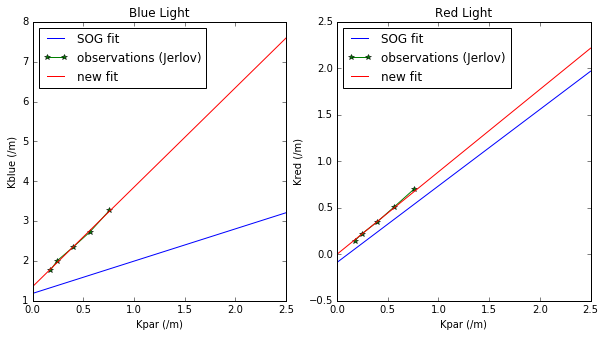

In [8]:
# and plot it.  Blue lines are the original.  Look pretty bad for blue

fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].plot(np.arange(0, 2.6,0.1), 1.1854+0.8102*np.arange(0, 2.6, 0.1), label="SOG fit")
ax[1].plot(np.arange(0, 2.6,0.1), -0.0879+0.8226*np.arange(0, 2.6, 0.1), label="SOG fit")
for i in range(2):
    ax[i].plot(kp, k[:,i], '*-', label='observations (Jerlov)')
    ax[i].plot(np.arange(0, 2.6,0.1), fit_k[i,1]+fit_k[i,0]*np.arange(0, 2.6, 0.1), label='new fit')
    ax[i].set_xlabel('Kpar (/m)')
    ax[i].legend(loc='upper left')
ax[0].set_ylabel('Kblue (/m)')
ax[1].set_ylabel('Kred (/m)')
ax[0].set_title('Blue Light')
ax[1].set_title('Red Light');